# 1.	Scrape this medium article (https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b) and create a word cloud to visualize frequently used words 

(Note: Select all paragraphs and join them together as a single string and pass it to python word cloud package)


# Importing Packages

In [6]:
from selenium import webdriver
browser = webdriver.Chrome('chromedriver.exe')

In [70]:
url='https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b?gi=2ab9cc98d13'
browser.get(url)

In [30]:
import pandas as pd
import bs4

In [72]:
div_tag = browser.find_element_by_css_selector('div.section-content')
para_tags= div_tag.find_elements_by_css_selector('p')
len(para_tags)

5

In [73]:
sentences=''
for para in para_tags:
    para_text= para.get_attribute('innerHTML')
    sentences= sentences+' '+ para_text
    sentences=bs4.BeautifulSoup(sentences,'html.parser').text

In [97]:
sentences[:20]

' Ah the dreaded mach'

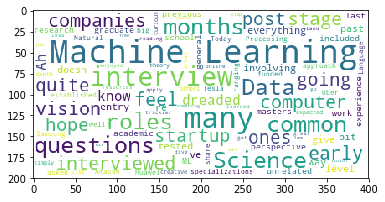

In [96]:
wc= WordCloud(background_color='white').generate(''.join(sentences))
plt.imshow(wc)

# 2.	Using amazon reviews data set do the following

In [2]:
import pandas as pd
import bs4

In [ ]:
# we are downloading  the csv from given below link

In [106]:
amazon = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/amazon_reviews.csv')
amazon.shape

(999, 10)

In [4]:
amazon.head(2)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09


### a.	create a corpus using sklearn package. 

In [5]:
docs = amazon['reviewText'].fillna('').str.lower().str.replace('[^a-z ]','')
docs.head()

0    we got this gps for my husband who is an otr o...
1    im a professional otr truck driver and i bough...
2    well what can i say  ive had this unit in my t...
3    not going to write a long review even thought ...
4    ive had mine for a year and heres what we got ...
Name: reviewText, dtype: object

In [6]:
import nltk
#nltk.download('stopwords')

stop_words= nltk.corpus.stopwords.words('english')

junk_words= ['amp','rt','https','will']
#len(stop_words)

stop_words.extend(junk_words)
len(stop_words)

183

In [7]:
def clean_text(row):
    row_words = row.split(' ')
    clean_words = [word for word in row_words if word not in stop_words]
    return ' '.join(clean_words)
docs_clean= docs.apply(clean_text)
docs_clean.head(1)

0    got gps husband otr road trucker  impressed sh...
Name: reviewText, dtype: object

### b.	Create the Document Term Matrix using unigrams

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
cv=CountVectorizer(ngram_range=(1,1))
sparse_martix= cv.fit_transform(docs_clean)
numpy_matrix= sparse_martix.toarray()
df = pd.DataFrame(numpy_matrix, columns= cv.get_feature_names())
df.shape

(999, 9438)

In [14]:
df.head()

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### c.	Identify top 25 unigrams and filter their respective columns from DTM

In [15]:
df.sum().sort_values(ascending= False ).head(25)[::-1].plot.barh(color= 'steelblue')

In [16]:
frequent_words = df.sum().sort_values(ascending= False).head(25).index
frequent_words

Index(['nook', 'books', 'kindle', 'one', 'screen', 'like', 'read', 'great',
       'use', 'get', 'tv', 'would', 'tablet', 'good', 'device', 'bn', 'also',
       'book', 'well', 'reading', 'bought', 'much', 'mount', 'dont', 'works'],
      dtype='object')

In [17]:
df=df[['nook', 'books', 'kindle', 'one', 'screen', 'like', 'read', 'great',
       'use', 'get', 'tv', 'would', 'tablet', 'good', 'device', 'bn', 'also',
       'book', 'well', 'reading', 'bought', 'much', 'mount', 'dont', 'works']]
df.head()

,nook,books,kindle,one,screen,like,read,great,use,get,...,bn,also,book,well,reading,bought,much,mount,dont,works
0,0,0,0,1,1,0,0,2,2,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,5,2,5,0,0,2,1,...,0,4,0,2,0,0,0,0,1,0
3,0,0,0,1,1,1,0,1,0,2,...,0,2,0,1,0,1,0,0,0,0
4,0,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### d.	Using these 25 columns, compute correlation matrix (if possible visualize the same using seaborn heatmap function). 

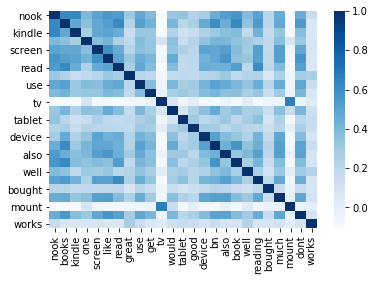

In [18]:
words_correlation = df[frequent_words].corr()
import seaborn as sns
sns.heatmap(words_correlation, cmap='Blues')

### e.	Using correlation matrix, Identify the pair of unigrams which has the highest correlation value

In [152]:
words_correlation.corr()

,nook,books,kindle,one,screen,like,read,great,use,get,...,bn,also,book,well,reading,bought,much,mount,dont,works
nook,1.000000,0.832652,0.850366,0.432493,0.715780,0.771263,0.771665,0.314940,0.663960,0.541758,...,0.646740,0.729429,0.767241,0.399936,0.748677,0.156561,0.633195,-0.724700,0.674484,-0.142972
books,0.832652,1.000000,0.725889,0.439679,0.724762,0.764471,0.867490,0.211076,0.750399,0.610147,...,0.831741,0.665896,0.860862,0.347544,0.782257,0.169392,0.692119,-0.683109,0.785558,-0.266469
kindle,0.850366,0.725889,1.000000,0.333985,0.708101,0.729778,0.711647,0.139304,0.501443,0.473092,...,0.505610,0.577691,0.615478,0.171578,0.679085,0.163096,0.520315,-0.601107,0.595862,-0.230734
one,0.432493,0.439679,0.333985,1.000000,0.454806,0.523853,0.303456,0.066239,0.464994,0.381796,...,0.509540,0.479395,0.421491,0.305605,0.280390,0.089881,0.469649,-0.313204,0.404402,-0.274237
screen,0.715780,0.724762,0.708101,0.454806,1.000000,0.834897,0.709821,0.230001,0.584830,0.489355,...,0.697339,0.752341,0.583576,0.301126,0.772899,0.133334,0.762205,-0.624570,0.728711,-0.257302
like,0.771263,0.764471,0.729778,0.523853,0.834897,1.000000,0.749259,0.329646,0.674151,0.552401,...,0.697586,0.803296,0.574826,0.344513,0.755193,0.142011,0.764495,-0.628682,0.816144,-0.273155
read,0.771665,0.867490,0.711647,0.303456,0.709821,0.749259,1.000000,0.261871,0.704330,0.543077,...,0.684494,0.655757,0.762773,0.193268,0.845016,0.177658,0.617372,-0.655534,0.753383,-0.262777
great,0.314940,0.211076,0.139304,0.066239,0.230001,0.329646,0.261871,1.000000,0.206250,0.146964,...,0.218690,0.337776,0.155603,0.232258,0.254906,-0.087959,0.263305,-0.486528,0.300755,0.256351
use,0.663960,0.750399,0.501443,0.464994,0.584830,0.674151,0.704330,0.206250,1.000000,0.538905,...,0.740103,0.667826,0.632683,0.386063,0.664346,0.172421,0.672324,-0.642147,0.717798,-0.133935
get,0.541758,0.610147,0.473092,0.381796,0.489355,0.552401,0.543077,0.146964,0.538905,1.000000,...,0.582485,0.494591,0.529951,0.262185,0.499173,0.069206,0.436170,-0.572394,0.578719,-0.228915


#### Read and books are highest correlated words

# 3.	Using the above Document Term Matrix

### a.	Use K-means clustering to cluster the reviews in to four groups

In [19]:
df.head(2)

,nook,books,kindle,one,screen,like,read,great,use,get,...,bn,also,book,well,reading,bought,much,mount,dont,works
0,0,0,0,1,1,0,0,2,2,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,1,0,0,1,0


In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [29]:
from sklearn.cluster import KMeans

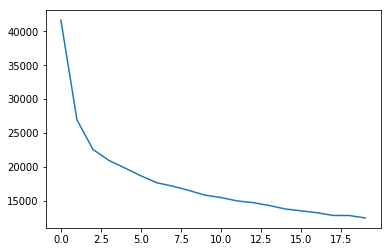

In [31]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [32]:
model_clus5 = KMeans(n_clusters = 4, max_iter=50)
model_clus5.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
df['Review_Groups']=model_clus5.labels_

### b.	Plot a bar chart to display no. of documents under each group

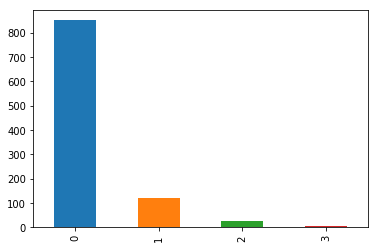

In [34]:
df['Review_Groups'].value_counts().plot(kind='bar')

### c.	Create Word cloud for each group

In [46]:
from wordcloud import WordCloud

In [47]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [48]:

df_0=df[df['Review_Groups']==0]
print(df_0.shape)

df_1=df[df['Review_Groups']==1]
print(df_1.shape)


df_2=df[df['Review_Groups']==2]
print(df_2.shape)


df_3=df[df['Review_Groups']==3]
print(df_3.shape)

(850, 26)
(120, 26)
(25, 26)
(4, 26)


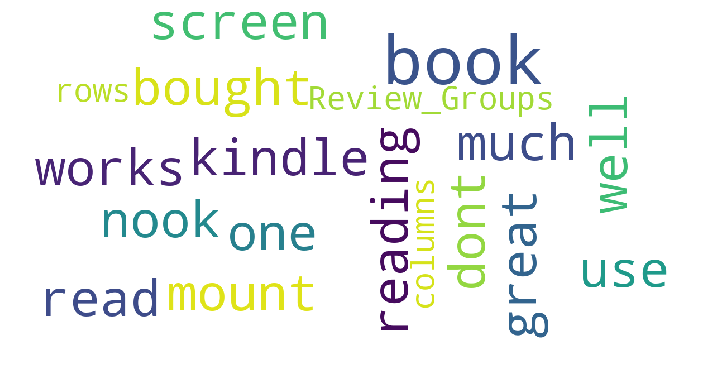

In [49]:
show_wordcloud(df_0)

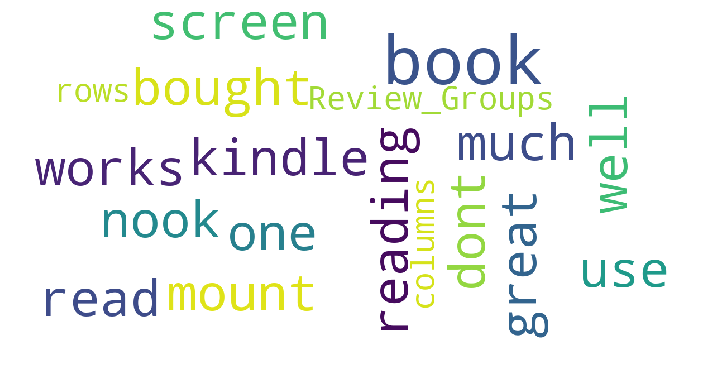

In [50]:
show_wordcloud(df_1)

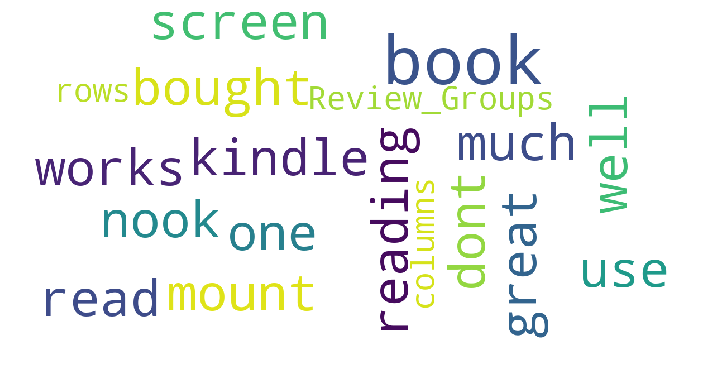

In [51]:
show_wordcloud(df_2)

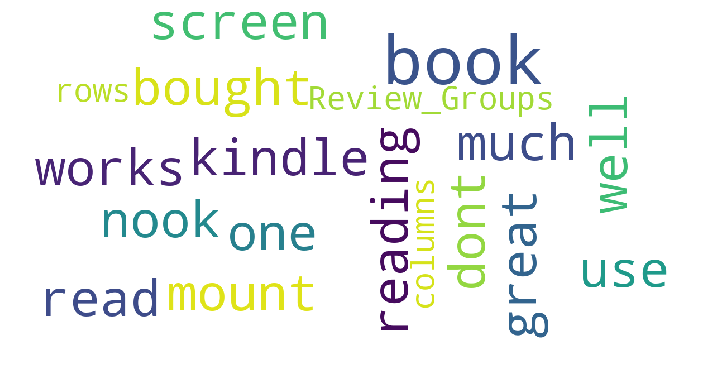

In [52]:
show_wordcloud(df_3)

# 4.	Using imdb movies reviews data set (imdb_sentiment.csv: https://bit.ly/2S2yXEd), create a supervised model to predict the sentiment of user reviews.

In [35]:
reviews=pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/imdb_sentiment.csv')
imdb.shape

(748, 2)

In [36]:
reviews.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [37]:
reviews.sentiment.unique()

array([0, 1])

### a.	Create a word cloud using the user reviews

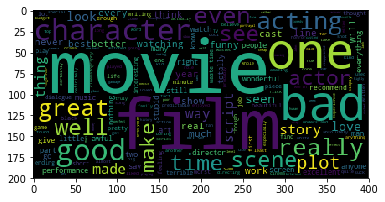

In [53]:
from wordcloud import WordCloud
wc= WordCloud().generate(' '.join(reviews['review']))
plt.imshow(wc)

### b.	Use random_state=100 while splitting data in to training (80%) and testing(20%).

In [62]:
import nltk

In [63]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jaggu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti=SentimentIntensityAnalyzer()

### c.	Comment if the target variable contains balanced or imbalanced classes (In target variable: 0 = negative, 1 = positive sentiment)

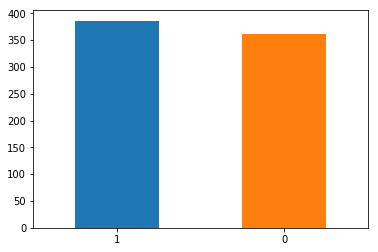

In [184]:
imdb.sentiment.value_counts().plot(kind="bar",rot = 0)

#### Sentiment feature is almost balanced with postive and negative ratings

### d.	Build various supervised classification models using the training data set

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import nltk

In [67]:
stop_words=nltk.corpus.stopwords.words('english')
stop_words=list(np.setdiff1d(stop_words,['not']))
junk_words=[]
stop_words.extend(junk_words)
stemmer=nltk.PorterStemmer()
docs=reviews['review'].fillna('').str.lower().str.replace('[^a-z ]','')
docs_clean=docs.apply(lambda v:' '.join([stemmer.stem(word) for word in v.split(' ') if word not in stop_words]))

train,test=train_test_split(docs_clean,test_size=0.2,random_state=100)



In [70]:
cv=CountVectorizer()
cv.fit(train)
train_x=cv.transform(train)
test_x=cv.transform(test)

train_y=reviews.loc[train.index]['sentiment']
test_y=reviews.loc[test.index]['sentiment']

adaboost_model=RandomForestClassifier(n_estimators=300,random_state=100)
adaboost_model.fit(train_x,train_y)
pred_class=adaboost_model.predict(test_x)
ad_bos=accuracy_score(test_y,pred_class)

### e.	Predict and compute accuracy of the model on test data set

In [71]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)
pred_class=lr.predict(test_x)
lr_ac=accuracy_score(test_y,pred_class)

/Users/jaggu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
from sklearn.neighbors import KNeighborsClassifier
kr=KNeighborsClassifier()
kr.fit(train_x,train_y)
pred_class=lr.predict(test_x)
kr_ac=accuracy_score(test_y,pred_class)

### f.	Identify which model is best for sentiment prediction

In [73]:
pd.DataFrame({'model':['RandomForestClassifier','LogisticRegression','KNeighborsClassifier'],'accuracy':[ad_bos,lr_ac,kr_ac]})

,model,accuracy
0,RandomForestClassifier,0.746667
1,LogisticRegression,0.760000
2,KNeighborsClassifier,0.760000


# 5.	Identify sentiment for the imdb user reviews using vader package. Comment the performance of supervised vs unsupervised sentiment prediction.

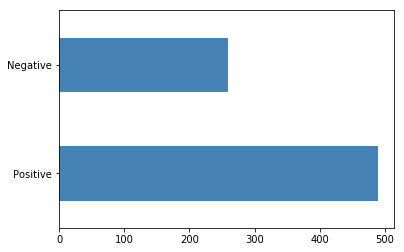

In [76]:
%matplotlib inline
def get_sentiment_score(review):
    compound_score=senti.polarity_scores(review)['compound']
    return compound_score

def get_sentiment(score):
    if score>0:
        return 'Positive'
    elif score<0:
        return 'Negative'
    else :
        return 'Positive'
    

reviews['sentiment_scores']=reviews['review'].apply(get_sentiment_score)
reviews['sentiment_vader']=reviews['sentiment_scores'].apply(get_sentiment)
#hotstar['sentiment_scores'].plot.hist()
reviews['sentiment_vader'].value_counts().plot.barh(color='steelblue')

In [78]:
reviews['sentiment_vader'].replace(['Negative','Positive'],[0,1],inplace=True)

In [79]:
reviews['sentiment_vader']

0      0
1      0
2      0
3      1
4      1
5      0
6      0
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
718    1
719    1
720    1
721    0
722    0
723    1
724    1
725    0
726    1
727    1
728    1
729    1
730    1
731    1
732    1
733    1
734    1
735    1
736    0
737    1
738    1
739    1
740    1
741    1
742    1
743    0
744    0
745    0
746    0
747    0
Name: sentiment_vader, Length: 748, dtype: int64

In [81]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(reviews['sentiment'],reviews['sentiment_vader'])
print(ac)

0.7767379679144385


In [ ]:
6)

In [83]:
abc = pd.read_csv('abcnews.csv')

In [84]:
abc.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [86]:
abc.shape

(1103665, 2)

In [87]:
import gensim

In [89]:
docs=abc['headline_text'].fillna('').str.lower().str.replace('[^a-z ]','')
docs.head()

0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object

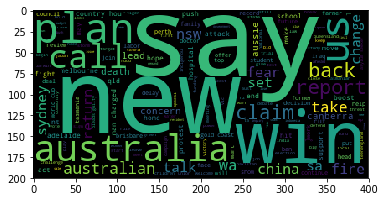

In [90]:
from wordcloud import WordCloud
wc=WordCloud().generate(' '.join(docs))
plt.imshow(wc)

In [91]:
docs_clean=[]
stopwords=nltk.corpus.stopwords.words('english')
junk_words=['','say']
stopwords.extend(junk_words)
 
for doc in docs:
    row_words=[word for word in doc.split(' ') if word not in stopwords]
    docs_clean.append(row_words)

len(docs_clean)

1103665

In [92]:
import gensim
dictionary=gensim.corpora.Dictionary(docs_clean)

In [93]:
docs_bow=[dictionary.doc2bow(doc) for doc in docs_clean]

In [94]:
ldamodel=gensim.models.LdaModel(docs_bow,id2word=dictionary,num_topics=4)
ldamodel

In [95]:
ldamodel.print_topics()

[(0,
  '0.012*"says" + 0.010*"nsw" + 0.010*"wa" + 0.010*"government" + 0.009*"election" + 0.008*"new" + 0.007*"donald" + 0.007*"sa" + 0.006*"could" + 0.005*"calls"'),
 (1,
  '0.016*"trump" + 0.010*"queensland" + 0.007*"canberra" + 0.007*"year" + 0.005*"australia" + 0.005*"new" + 0.005*"us" + 0.005*"women" + 0.005*"tasmania" + 0.005*"afl"'),
 (2,
  '0.016*"police" + 0.015*"man" + 0.010*"court" + 0.007*"sex" + 0.007*"death" + 0.006*"perth" + 0.006*"woman" + 0.006*"murder" + 0.006*"charged" + 0.005*"found"'),
 (3,
  '0.013*"australian" + 0.011*"australia" + 0.008*"melbourne" + 0.008*"world" + 0.007*"one" + 0.007*"us" + 0.007*"first" + 0.006*"attack" + 0.006*"says" + 0.005*"day"')]

In [96]:
topics=[]
for doc_bow in docs_bow:
    topic=pd.DataFrame(ldamodel.get_document_topics(doc_bow),columns=['topic','prob']).sort_values('prob').tail(1)['topic'].values[0]
    topics.append(topic)

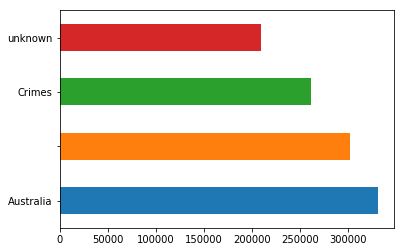

In [98]:
abc['topic_number']=topics
abc['topic']=abc['topic_number'].replace({0:'Australia',1:'unknown',2:'',3:'Crimes'})
abc['topic'].value_counts().plot.barh()

In [99]:
df_topic2word=pd.DataFrame()
for topic_number in range(4):
    df=pd.DataFrame(ldamodel.get_topic_terms(topic_number),columns=['wordid','prob'])
    df['word']=df['wordid'].apply(lambda v: dictionary[v])
    df['topic']=topic_number
    df_topic2word=df_topic2word.append(df,ignore_index=True)

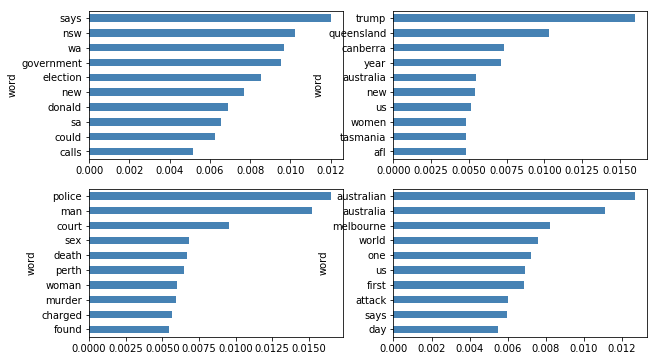

In [100]:
import matplotlib.pyplot as plt
df_topic2word.index=df_topic2word['word']
fig,axs=plt.subplots(2,2)
df_topic2word[df_topic2word['topic']==0]['prob'][::-1].plot.barh(color='steelblue',ax=axs[0,0],figsize=(10,6))
df_topic2word[df_topic2word['topic']==1]['prob'][::-1].plot.barh(color='steelblue',ax=axs[0,1],figsize=(10,6))
df_topic2word[df_topic2word['topic']==2]['prob'][::-1].plot.barh(color='steelblue',ax=axs[1,0],figsize=(10,6))
df_topic2word[df_topic2word['topic']==3]['prob'][::-1].plot.barh(color='steelblue',ax=axs[1,1],figsize=(10,6))

